In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [320]:
df=pd.read_csv('bank.csv')

In [321]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [322]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [324]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [325]:
df.shape

(11162, 17)

In [326]:
df.nunique().sort_values(ascending=True)

deposit         2
loan            2
housing         2
default         2
contact         3
marital         3
poutcome        4
education       4
job            12
month          12
day            31
previous       34
campaign       36
age            76
pdays         472
duration     1428
balance      3805
dtype: int64

In [327]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [328]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [329]:
y=df["deposit"]

In [330]:
y

0        yes
1        yes
2        yes
3        yes
4        yes
        ... 
11157     no
11158     no
11159     no
11160     no
11161     no
Name: deposit, Length: 11162, dtype: object

In [331]:
x=df.drop(['deposit'],axis=1)

In [332]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
x=x.apply(LabelEncoder().fit_transform)

In [333]:
x.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.031616,-0.442829,-0.126086,-0.011421,0.138945,-0.168690,-0.031407,0.027776,-0.000782,-0.026105,0.000049,-0.005842,0.002171,0.022643,-0.002701
job,-0.031616,1.000000,0.078314,0.147046,-0.007066,0.041978,-0.136965,-0.067092,-0.087915,0.026589,-0.076011,0.004349,0.004164,-0.005552,0.012983,-0.004238
marital,-0.442829,0.078314,1.000000,0.125845,-0.014691,0.002412,-0.036345,-0.062029,-0.060456,-0.003642,-0.004070,0.008605,-0.031068,0.031396,0.032948,-0.039424
education,-0.126086,0.147046,0.125845,1.000000,-0.010709,0.068981,-0.109168,-0.073154,-0.132540,0.016759,-0.055868,-0.016569,-0.007665,0.021436,0.026279,-0.040262
default,-0.011421,-0.007066,-0.014691,-0.010709,1.000000,-0.111444,0.011076,0.076434,0.035709,0.017342,0.000950,-0.007812,0.032001,-0.035981,-0.037036,0.042357
balance,0.138945,0.041978,0.002412,0.068981,-0.111444,1.000000,-0.101124,-0.129000,-0.045555,0.008581,0.025419,0.041957,-0.039625,0.034184,0.062488,-0.055544
housing,-0.168690,-0.136965,-0.036345,-0.109168,0.011076,-0.101124,1.000000,0.076761,0.226392,-0.014770,0.219602,0.033603,0.005053,0.071124,-0.003586,-0.046370
loan,-0.031407,-0.067092,-0.062029,-0.073154,0.076434,-0.129000,0.076761,1.000000,0.006829,0.017269,0.025329,-0.006501,0.035491,-0.029056,-0.027478,0.026344
contact,0.027776,-0.087915,-0.060456,-0.132540,0.035709,-0.045555,0.226392,0.006829,1.000000,0.007943,0.289803,-0.028783,0.058695,-0.231663,-0.179922,0.257993
day,-0.000782,0.026589,-0.003642,0.016759,0.017342,0.008581,-0.014770,0.017269,0.007943,1.000000,-0.019840,-0.022901,0.139886,-0.079644,-0.060488,0.080221


<Axes: >

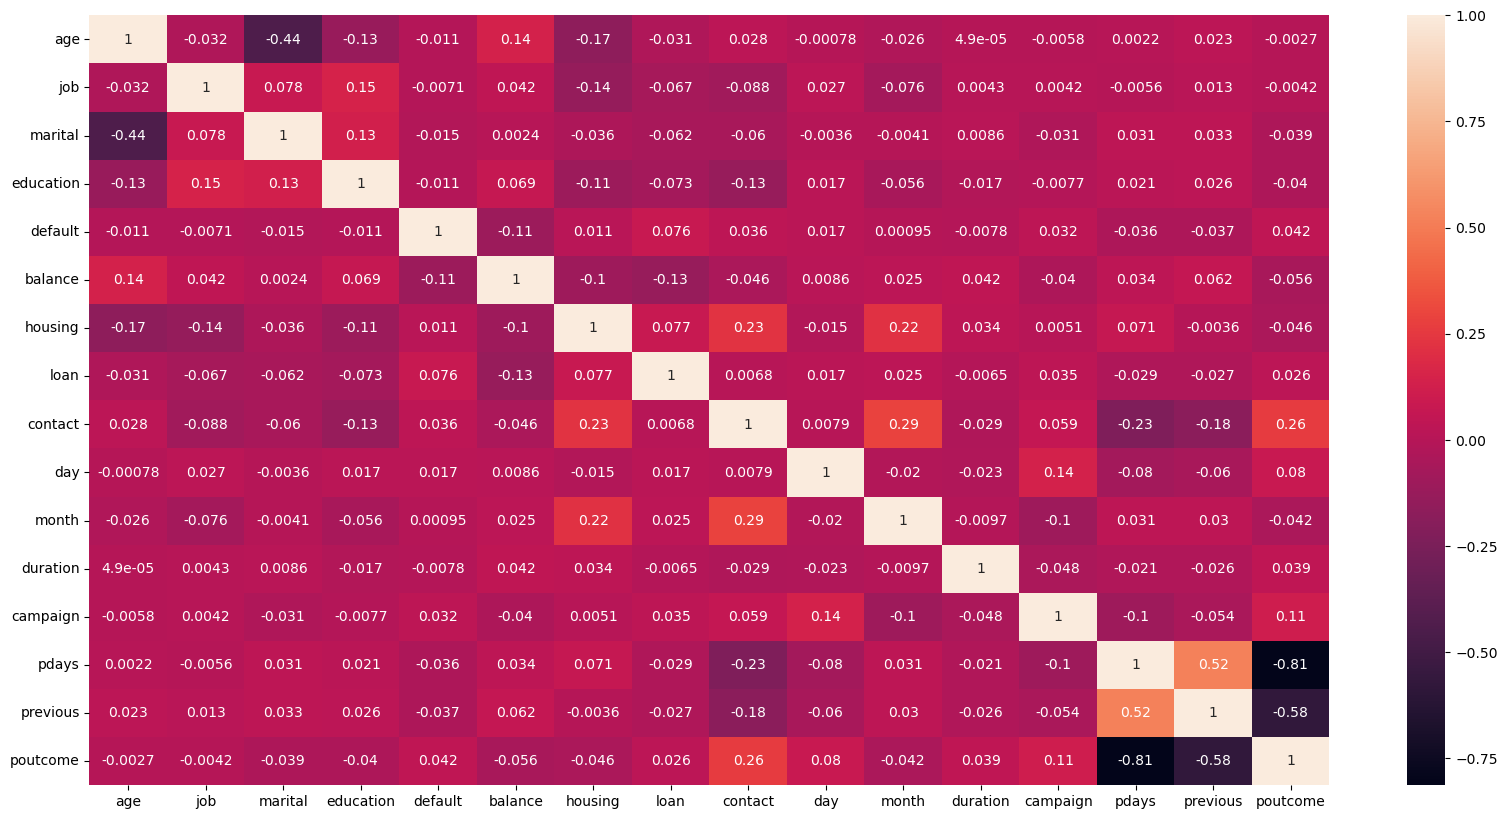

In [334]:
plt.figure(figsize = (20,10))
sns.heatmap(x.corr(),annot = True)

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123,stratify=y)

In [337]:
from sklearn.tree import DecisionTreeClassifier

In [338]:
dt=DecisionTreeClassifier()

In [339]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [340]:
y_pred=dt.predict(x_test)

In [341]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [342]:
confusion_matrix(y_test,y_pred)

array([[1390,  372],
       [ 399, 1188]], dtype=int64)

In [343]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1762
           1       0.76      0.75      0.76      1587

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349



In [344]:
accuracy_score(y_test,y_pred)*100

76.97820244849208